<p style="text-align: center;">An Analysis of the Probability of Demission Request using Logistic Regression in TensorFlow

## 1. Introduction:

<p style="text-align: justify;"><font size="3">Nowadays, several companies possess a database with informations about their employes. With an appropriated analysis of this data is possible to identify the profile of the employes and with this information make predictions about future demission requests.</font></p>

<p style="text-align: justify;"><font size="3">In this way, the RHAnalytics problem is defined, aiming to present which employees will tend to request for dismissal through the application of the Logistic Regression algorithm. In this sense, a real database is used, where the characteristics that are shown below are analyzed.</font></p>

- 
<p style="text-align: justify;"><font size="3">
Green: Quantitative
</font></p>

- 
<p style="text-align: justify;"><font size="3">
Yellow: Qualitative
</font></p>

- 
<p style="text-align: justify;"><font size="3">
Orange: Output
</font></p>


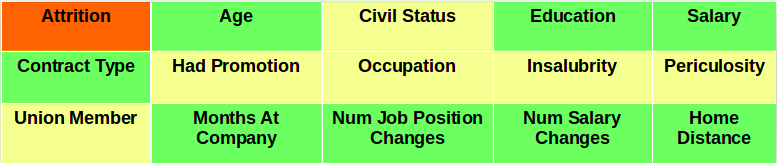

<p style="text-align: justify;"><font size="3">To begin the process of development of the model, it is necessary to pre-process the data and to perform binarization of the contents of some features.</font></p>

## 2. Logistic Regression
### I. Principles of Operation

<p style="text-align: justify;"><font size="3">Logistic Regression is an important and widely used tool for machine learning  and statistics. It is capable of perform classification when there are several independent variables that make influence in the output. Logistic Regression is in the class of techniques of supervised learning, where the input and output data are known. Other examples of supervised learning techniques are Neural Networks, Decision Trees, Bayesian Networks and Support Vector Machines.</p>

<p style="text-align: justify;"> The name Logistic Regression is due to the fact of some similarities with the Linear Regression, but Logistic Regression doesn’t really perform regression (prediction of continuous values), but classification. Both of them are based on a function Y, where the inputs (X) are multiplied by weights (W) and them added to a constant value (b – bias).</font></p>

$$Y \left ( x \right ) = b_{0} + W_{1}X_{1} + ... + W_{p}X_{p}$$

<p style="text-align: justify;"><font size="3">On Linear Regression the value provided by Y is the output of the model. On the other hand, in Logistic Regression the Y value is inserted in an activation function (sigmoid) where its value is converted into a probability P(Y).</font><p>

$$P \left ( Y=1 \right ) = \frac{1}{1+e^{-Y \left ( x \right ) }}$$

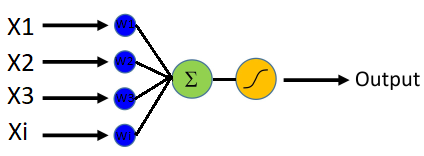

### II. Implementation 

<p style="text-align: justify;"><font size="3">
For the development and analysis of the solution with Logistic Regression, some frameworks for Machine Learning are used. This frameworks are available in the Intel Distribution for Python, a package capable of accelerate and scale the application performance.
</font></p>

<p style="text-align: justify;"><font size="3">
The most important framework for this application is TensorFlow, an open source software library for Machine Intelligence for numerical computation using data flow graphs.
</font></p>

### 2.1 Importing Libraries

<p style="text-align: justify;"><font size="3">
- <u>Pandas</u>: is a Python package providing fast, flexible, and expressive data structures.
- <u>Numpy</u>: is a fundamental package of the Python language that allows to work with arrays, vectors and matrices of N dimensions.
- <u>TensorFlow</u>: is a symbolic math library.
- <u>Matplotlib</u>: is a Python 2D plotting library.
- <u>Sklearn</u>: is a library for data mining and data analysis.
</font><p>

In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

### 2.2 Loading Data

<p style="text-align: justify;"><font size="3"> 
In this part, the dataset, presented in a .csv file, is opened and readed. All its content is attached to a variable. After that a Pandas's DataFrame is created with the data.
The DataFrame is a 2-dimensional labeled data structure with columns of potentially different types. 
</font><p>

In [2]:
d = pd.read_csv('rhanalytics.csv',delimiter=';')
data = pd.DataFrame(d)

### 2.3  Pre-processing

<p style="text-align: justify;"><font size="3">
The first step to apply the Logistic Regression consists of the pre-processing of the data. Some of the characteristics derived from the used dataset contains values that the classification model cannot process (qualitative) or that need refinement. For this purpose, it is used the Pandas library, which presents suitable methods for the treatment of the data.
</font><p>



In [3]:
data = data.drop('Id', 1)

data['Civil_Casado'] = data['CivilStatus'] == 'United'
data['Civil_Solteiro'] = data['CivilStatus'] == 'Single'
data['Civil_Separado'] = data['CivilStatus'] == 'Desunited'

data = data.drop('CivilStatus', 1)

data['Contrato_1'] = data['ContractType'] == 1
data['Contrato_10'] = data['ContractType'] == 10

data = data.drop('ContractType', 1)

data['HadPromotion'] = data['HadPromotion'].map({'Yes': 1, 'No': 0})
data['Insalubrity'] = data['Insalubrity'].map({'Yes': 1, 'No': 0})
data['Periculosity'] = data['Periculosity'].map({'Yes': 1, 'No': 0})
data['UnionMember'] = data['UnionMember'].map({'Yes': 1, 'No': 0})
data['Stability'] = data['Stability'].map({'Yes': 1, 'No': 0})
data['HasDependents'] = data['HasDependents'].map({'Yes': 1, 'No': 0})
data['Attrition'] = data['Attrition'].map({'Yes': 1, 'No': 0})

### 2.4 Data Splitting

<p style="text-align: justify;"><font size="3">
When training a machine learning model, it is important to perform the accuracy check during or after training. For this purpose, the cross-validation technique can be used. It is the separation of the dataset into 2 parts, one for training and another for validation. The data for each set must be unique.
</font></p>

<p style="text-align: justify;"><font size="3">
In this application the cross-validation method used is the holdout, where the data is separated before the training and maintained throughout the process. As the partitioning of the data occurs in a random and different way in each execution, variations of accuracy can occur in the final result.
</font></p>

In [4]:
train, test = train_test_split(data, test_size=0.3)

trainY = train['Attrition']
trainX = train.drop('Attrition', 1)
testY = test['Attrition']
testX = test.drop('Attrition', 1)

temp = trainY.shape
trainY = trainY.values.reshape(temp[0], 1)
temp = testY.shape
testY = testY.values.reshape(temp[0], 1)
testX = np.array(testX)

<p style="text-align: justify;"><font size="3">
After pre-processing, the information is allocated in Numpy arrays. The resulting data are separated into 4 parts, which are input and output for training and input and output for testing.
</font><p>

<p style="text-align: justify;"><font size="3">
The next step is the construction of the classifier model. Before this, it is interesting to define the size of the inputs and outputs of the system, as well as a number of training epochs. This prior definition allows future changes to be easily made.
</font><p>

In [5]:
n_out = 1
n_in = 20
epochs = 200

### 2.5 Model Specification

<p style="text-align: justify;"><font size="3">
To start the specification of the model, it is necessary to define the points of entry and exit of the data, these being characterized in Tensorflow by the tf.placeholder. At this point, you define the type and format of the data that will be used. 
<font></p></p>

<p style="text-align: justify;">
In the sequence, the variables of weights (W) and bias (b) are created. In Tensorflow, the tf.variable command is used to perform this task. Along with this procedure, it is important to define the initial values of these variables, which can be zero, one or random. 
</font></p></p>

<p style="text-align: justify;">
After this procedure, the template must be specified. Using the methods available in Tensorflow (tf.add / tf.matmul) it is possible to add to the code the formula presented at the beginning of the text. Each operation performed using TensorFlow methods generates a node, and the connection of all this nodes is called a Graph.
</font></p>

In [6]:
x = tf.placeholder('float', [None,n_in])
y = tf.placeholder('float', [None,n_out])

weights = tf.Variable(tf.ones([n_in, n_out]))
bias = tf.Variable(tf.ones([n_out]))

y_output = tf.add(tf.matmul(x, weights),bias)
y_output_t = tf.sigmoid(y_output)

### 2.6 Training Model

- 
<p style="text-align: justify;"><font size="3">
Cost: The cost function is used to estimate the error between the created model and the desired output value. The calculation is done for all input data inserted in the training step and the result is the mean value of the errors, provided by the tf.reduce_mean method.</font></p>



- 
<p style="text-align: justify;"><font size="3">
Optimizer: The resulting value from the cost function is passed on to the optimizer so that it can adjust the parameters of the model. The parameters are contained in the variables weight and bias. In each training epoch, the error is calculated and a small adjustment is made to the values. The adjustment ratio is defined by the learning_rate parameter, whose value must be specified empirically. Very large values of learning_rate can cause the model to diverge, on the other hand, very small values will generate very slow training and the possibility of the model not converging to an optimal value.</font></p>

<p style="text-align: justify;"><font size="3">After specifying the model, it is necessary to define the cost function that will be used. As a cost function, the Cross-Entropy method was used, often used in classification problems. Tensorflow provides a Cross Entropy with integrated Sigmoid activation function.</font></p>

In [7]:
cost = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(logits=y_output, labels=y))

<p style="text-align: justify;"><font size="3">It is also necessary to define the optimization function. Thus, among the various options available, the optimizer Adam was selected. It is a gradient descent optimizer that through a series of extra calculations performs accurate and smooth updates. In addition, it was the one that presented the best result in the application of the model. </fonte></p>

In [8]:
optimizer = tf.train.AdamOptimizer(learning_rate=0.05, beta1=0.9, beta2=0.99).minimize(cost)

<p style="text-align: justify;"><font size="3">
All the definitions made using the Tensorflow methods can not be executed directly, so, for the process of learning and verifying the model it is necessary to create a tf.Session.
</font></p>

<p style="text-align: justify;"><font size="3">
The first step inside the Session is the initialization of Tensorflow variables. Weights and bias variables cannot be used before this procedure.
</font></p>

<p style="text-align: justify;"><font size="3">
The training process must occur within tf.Session and can be executed as many epochs as necessary or until the system converges to the desired precision. For this, it's necessary to create a loop specifying the number of iterations. The optimization process must be executed at the same time that the training data is inserted (feed_dict) to the model through the placeholders.
</font></p>

<p style="text-align: justify;"><font size="3">
In the presented problem, both the optimizer and the cost function are executed together, in order to follow the evolution of the training process. If it is necessary, the execution can be splitted, one by each process. The value returned from the cost function, which is the average of the calculated errors, is then appended to a list.
</font></p>

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    costs = []
    for i in range(epochs):        
        _, c = sess.run([optimizer, cost], feed_dict={x: trainX, y: trainY})
        costs.append(c)

### 2.6 Execution of Test

<p style="text-align: justify;"><font size="3">
After completing the training, the cost values are plotted in the form of a time graph for better visualization. With this, it is possible to verify that the model has been successfully trained.</font></p>

<p style="text-align: justify;"><font size="3">
To measure the accuracy of the trained model the opition made was for a manual verification instead of the possibility made available by the tool. For this, a loop is defined by the range of the amount of test data.
</font></p>

<p style="text-align: justify;"><font size="3">
As a result of the utilization of the Sigmoid activation function, which returns probability values ranging from 0 to 1, the binarization of the values is done to simplify the process of comparison between the obtained and expected values. The comparison is then made and the results are displayed.
</font></p>

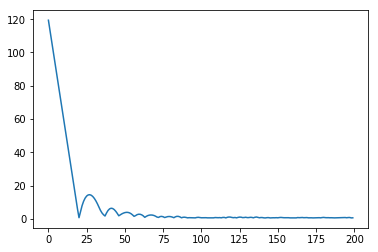

Samples Well Classified: 515
Samples Misclassified: 224
Accuracy: 69.69 %


In [9]:
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    costs = []
    for i in range(epochs):        
        _, c = sess.run([optimizer, cost], feed_dict={x: trainX, y: trainY})
        costs.append(c)

    plt.plot(costs)
    plt.show()
        
    wrong, right = 0, 0
    
    for i in range(len(testY)):
        x_data = np.array([testX[i]])
        a = sess.run(y_output_t, feed_dict={x:x_data})
        
        if(a >= 0.5): a = 1
        else: a = 0        
        if(a == testY[i]):right+=1
        else:wrong+=1
               
    print('Samples Well Classified:',right)
    print('Samples Misclassified:',wrong)   
    print('Accuracy:','{:.2f}'.format(100*(right/(right+wrong))),'%')

### III. Results Analysis 

<p style="text-align: justify;"><font size="3">The result obtained shows an accuracy around 70%, which for stochastic characteristic data can be considered satisfactory. The data considered for the construction of the model seem to describe with some precision the characteristic behavior of a person who may resign in the near future. Even so, it should be taken into account that external factors, not considered and difficult to measure, such as job satisfaction, other work proposals, need to move house, among others, are quite relevant to take a person to make such a decision.</font></p>

<p style="text-align: justify;"><font size="3">In this case, the Logistic Regression technique was used. As a possibility to try to achieve more expressive results, it would be possible to use other methods, such as Neural Networks, that allow for more embracing classifications.</font></p>